In [14]:
import pandas as pd
import seaborn as sns; sns.set()
%matplotlib inline 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=15,5

### Read CSV dataset

In [15]:
df = pd.read_csv('NCHS_-_Leading_Causes_of_Death__United_States.csv')

In [16]:
df.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2012,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,21,2.6
1,2016,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.7
2,2013,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.8
3,2000,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,District of Columbia,23,3.8
4,2014,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Arizona,325,4.1


### Calculate cancer percentage per year

The dataset contains data for all states plus a row for United States that is a sum of all the states' data.

First, we collect the data for cancer stats in the United States as a whole:

In [17]:
df_canc = df[(df['Cause Name'] == 'Cancer') & (df['State'] == 'United States')].sort_values(by='Year').reset_index(drop=True)
df_canc.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,1999,Malignant neoplasms (C00-C97),Cancer,United States,549838,200.8
1,2000,Malignant neoplasms (C00-C97),Cancer,United States,553091,199.6
2,2001,Malignant neoplasms (C00-C97),Cancer,United States,553768,196.5
3,2002,Malignant neoplasms (C00-C97),Cancer,United States,557271,194.3
4,2003,Malignant neoplasms (C00-C97),Cancer,United States,556902,190.9


Next, we collect the data for all diseases in the United States as a whole:

In [18]:
df_all = df[(df['Cause Name'] == 'All causes') & (df['State'] == 'United States')].sort_values(by='Year').reset_index(drop=True)
df_all.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,1999,All Causes,All causes,United States,2391399,875.6
1,2000,All Causes,All causes,United States,2403351,869.0
2,2001,All Causes,All causes,United States,2416425,858.8
3,2002,All Causes,All causes,United States,2443387,855.9
4,2003,All Causes,All causes,United States,2448288,843.5


Note that we have to sort the values and reset the index for both dataframes in order to calculate the percentage:

In [19]:
# goes through each row in each dataframe and calculates the percentage using the deaths columns
df_canc['Percentage'] = df_canc['Deaths'] / df_all['Deaths']
df_canc.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate,Percentage
0,1999,Malignant neoplasms (C00-C97),Cancer,United States,549838,200.8,0.229923
1,2000,Malignant neoplasms (C00-C97),Cancer,United States,553091,199.6,0.230133
2,2001,Malignant neoplasms (C00-C97),Cancer,United States,553768,196.5,0.229168
3,2002,Malignant neoplasms (C00-C97),Cancer,United States,557271,194.3,0.228073
4,2003,Malignant neoplasms (C00-C97),Cancer,United States,556902,190.9,0.227466


Text(0.5, 1.0, 'Cancer death rate as a percentage of total deaths')

<Figure size 720x360 with 0 Axes>

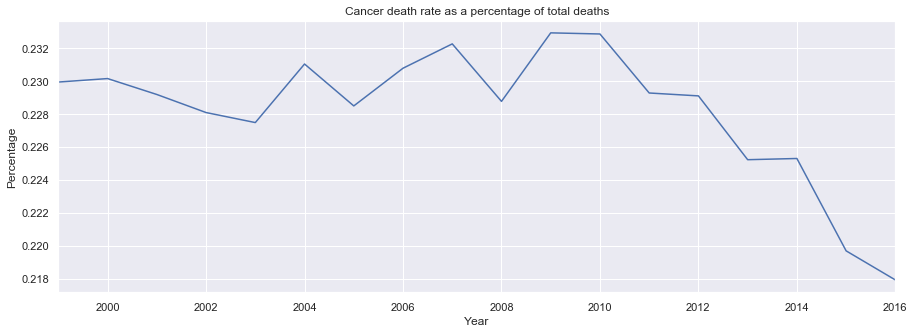

In [20]:
# plot data
fig = plt.figure(figsize=(10,5))
df_canc[['Year', 'Percentage']].set_index('Year').plot(legend=None)
plt.ylabel('Percentage')
plt.title("Cancer death rate as a percentage of total deaths")

### Calculate top three deadliest diseases per year

The dataset contains data for different types of diseases plus a row for all causes that is a sum of all the diseases' data.

For our purposes in finding the top three deadliest diseases per year, we do not want to include the all causes row because all causes is not a distinct disease:

In [21]:
df_diseases = df[(df['State'] == 'United States') & (df['Cause Name'] != 'All causes')]
df_diseases.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
489,2000,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,United States,29350,10.4
510,1999,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,United States,29199,10.5
535,2001,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,United States,30622,10.7
551,2003,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,United States,31484,10.8
566,2005,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,United States,32637,10.9


In [22]:
# group_by diagnostics
'''
for name, group in df_diseases.groupby(['Cause Name', 'Year']):
    print(name)
    print(group)

def foo(gr): 
    print(gr)
    return gr.nlargest(3, 'Deaths')
 
df_b = df_diseases.groupby(['Year']).apply(func=foo)
'''

"\nfor name, group in df_diseases.groupby(['Cause Name', 'Year']):\n    print(name)\n    print(group)\n\ndef foo(gr): \n    print(gr)\n    return gr.nlargest(3, 'Deaths')\n \ndf_b = df_diseases.groupby(['Year']).apply(func=foo)\n"

We group by year and get the three largest diseases by death count per year:

In [23]:
df_nlargest = df_diseases.groupby(['Year']).apply(lambda grp: grp.nlargest(3, 'Deaths')).set_index('Year')

We then group by year again and calculate the rank of each disease:

In [24]:
df_nlargest['Rank'] = df_nlargest.groupby(['Year'])['Deaths'].rank(ascending=0, method='max')
df_nlargest.head()

,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate,Rank
Year,,,,,,
1999,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,United States,725192,266.5,1.0
1999,Malignant neoplasms (C00-C97),Cancer,United States,549838,200.8,2.0
1999,Cerebrovascular diseases (I60-I69),Stroke,United States,167366,61.6,3.0
2000,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,United States,710760,257.6,1.0
2000,Malignant neoplasms (C00-C97),Cancer,United States,553091,199.6,2.0


We create a pivot table to display per year the rank of the top three diseases:

In [25]:
df_pivot = pd.pivot_table(df_nlargest, index = 'Year', columns = 'Cause Name', values = 'Rank')
df_pivot.head()

Cause Name,CLRD,Cancer,Heart disease,Stroke,Unintentional injuries
Year,,,,,
1999,NaN,2.0,1.0,3.0,NaN
2000,NaN,2.0,1.0,3.0,NaN
2001,NaN,2.0,1.0,3.0,NaN
2002,NaN,2.0,1.0,3.0,NaN
2003,NaN,2.0,1.0,3.0,NaN


Text(0.5, 1.0, 'Leading casuses of deaths per year')

<Figure size 1080x360 with 0 Axes>

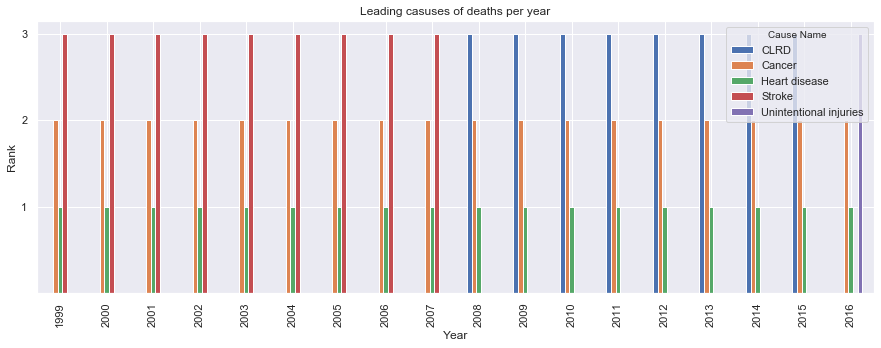

In [26]:
# grouped bar plot
fig = plt.figure(figsize=(15,5))
df_pivot.plot(kind = 'bar')
plt.ylabel('Rank')
plt.yticks([1,2,3]) 
plt.title("Leading casuses of deaths per year")